# AT3 - Airfare Prediction : Data Exploration, cleaning and split to train,val and test datasets

## This is the second notebook to be executed to load the dataset with extracted features and visualise
1. Call the custom function to extract the data from ../data/interim/extractedFeatures1/ combine them into single dataframe
2. Data cleaning
3. Data exploration and visualisations
4. Split the datasets into train, validation and test datasets. And save the datasets into the /data/processed folder. 

# 1. Loading the dataset

## 1.1. Launch commands to automatically reload modules

In [1]:
%load_ext autoreload
%autoreload 2

## 1.2. Import the packages and custom functions

In [2]:
import pandas as pd
import numpy as np
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display


# Get the current working directory
current_dir = os.getcwd()

# Add the src directory to sys.path
sys.path.append(os.path.abspath(os.path.join(current_dir, '..', 'src')))

# Import the custom functions
from models.data_exploration import display_data_info
from models.data_extraction import load_parquet_files_from_folder
from models.sets import save_sets, load_sets, split_sets_by_time

## 1.3. Load the dataset

In [3]:
folder_path = '../data/interim/extractedFeatures1'
df_data = load_parquet_files_from_folder(folder_path)


Loaded 'extracted_ATL_itineraries_aa.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ab.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ac.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ad.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ae.parquet' successfully.
Loaded 'extracted_ATL_itineraries_af.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ag.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ah.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ai.parquet' successfully.
Loaded 'extracted_ATL_itineraries_aj.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ak.parquet' successfully.
Loaded 'extracted_ATL_itineraries_al.parquet' successfully.
Loaded 'extracted_ATL_itineraries_am.parquet' successfully.
Loaded 'extracted_ATL_itineraries_an.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ao.parquet' successfully.
Loaded 'extracted_ATL_itineraries_ap.parquet' successfully.
Loaded 'extracted_ATL_itineraries_aq.par

In [4]:
display_data_info(df_data)

Top 5 rows of data:
  startingAirport destinationAirport  totalFare  \
0             ATL                BOS      248.6   
1             ATL                BOS      248.6   
2             ATL                BOS      248.6   
3             ATL                BOS      248.6   
4             ATL                BOS      248.6   

        segmentsDepartureTimeRaw segmentsCabinCode  departure_day  \
0  2022-04-17T12:57:00.000-04:00             coach             17   
1  2022-04-17T06:30:00.000-04:00             coach             17   
2  2022-04-17T11:35:00.000-04:00             coach             17   
3  2022-04-17T13:59:00.000-04:00             coach             17   
4  2022-04-17T09:59:00.000-04:00             coach             17   

  departure_dayofweek  departure_month  departure_hour  departure_minute  \
0              Sunday                4              16                57   
1              Sunday                4              10                30   
2              Sunday         

# 2. Data Cleaning

## 2.1 Handling duplicates

In [5]:
df_data = df_data.drop_duplicates()

In [6]:
display_data_info(df_data)

Top 5 rows of data:
  startingAirport destinationAirport  totalFare  \
0             ATL                BOS      248.6   
1             ATL                BOS      248.6   
2             ATL                BOS      248.6   
3             ATL                BOS      248.6   
4             ATL                BOS      248.6   

        segmentsDepartureTimeRaw segmentsCabinCode  departure_day  \
0  2022-04-17T12:57:00.000-04:00             coach             17   
1  2022-04-17T06:30:00.000-04:00             coach             17   
2  2022-04-17T11:35:00.000-04:00             coach             17   
3  2022-04-17T13:59:00.000-04:00             coach             17   
4  2022-04-17T09:59:00.000-04:00             coach             17   

  departure_dayofweek  departure_month  departure_hour  departure_minute  \
0              Sunday                4              16                57   
1              Sunday                4              10                30   
2              Sunday         

## 2.2 Visualising and Removing the records with 'null' values in cabin_type

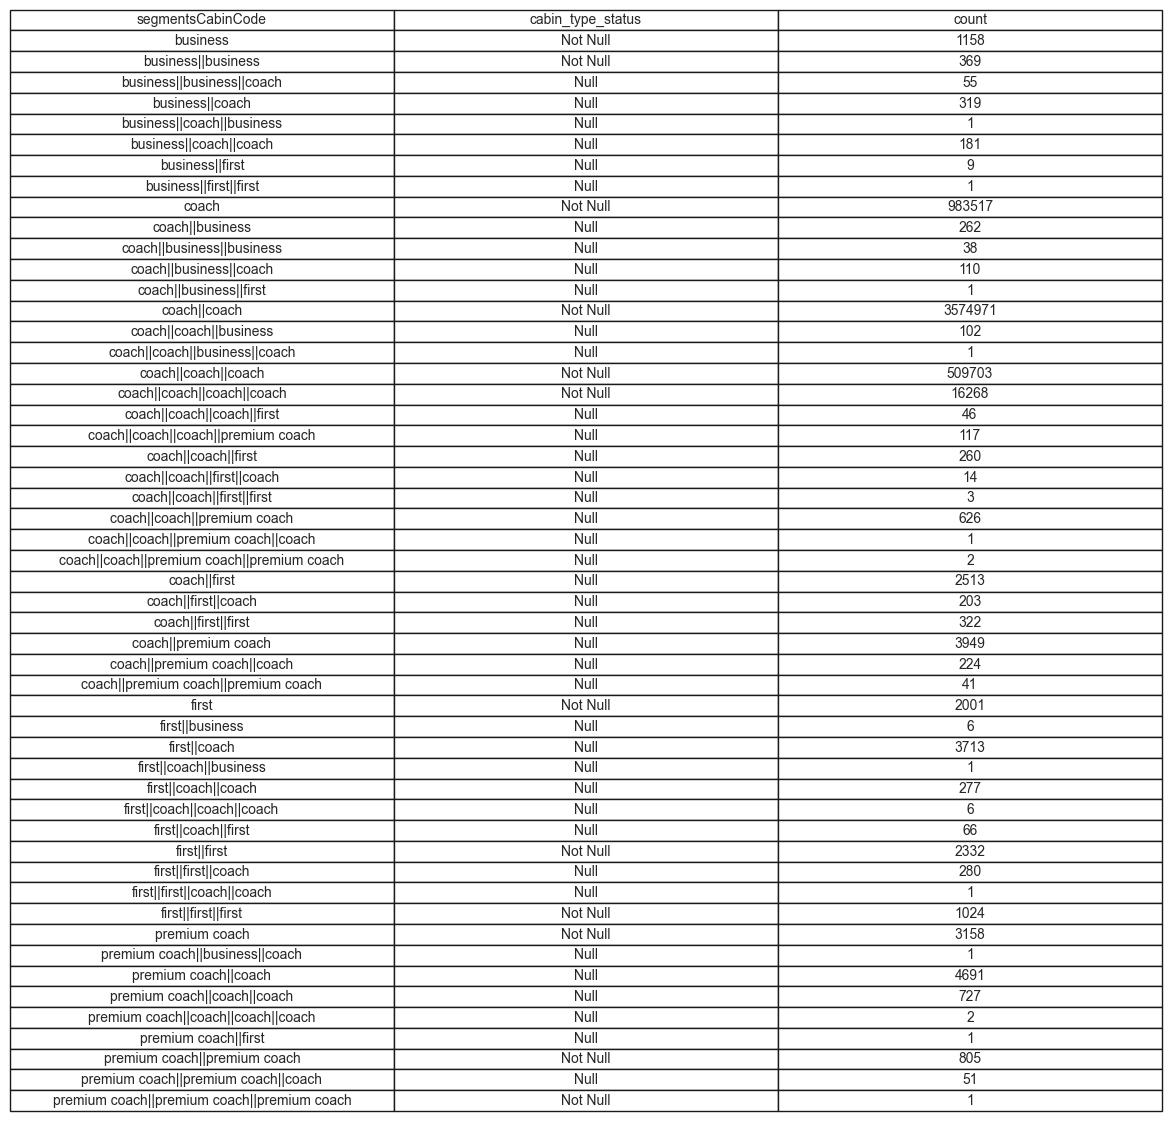

In [7]:
# Visualising the cabin_type values along with 'segmentsCabinCode' to check if the extraction code works correctly
sns.set(style="whitegrid")

# Create a new column for cabin_type_status
df_data['cabin_type_status'] = df_data['cabin_type'].isnull().replace({True: 'Null', False: 'Not Null'})

# Count occurrences of each unique segmentsCabinCode grouped by cabin_type_status
count_data = df_data.groupby(['segmentsCabinCode', 'cabin_type_status']).size().reset_index(name='count')

# Display the count data in a table
plt.figure(figsize=(12, 8)) 
table = plt.table(cellText=count_data.values, colLabels=count_data.columns, cellLoc='center', loc='center')
table.set_fontsize(12)            
table.scale(1.2, 1.2)             

plt.axis('off')  

# Adjust layout parameters manually
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

plt.show()


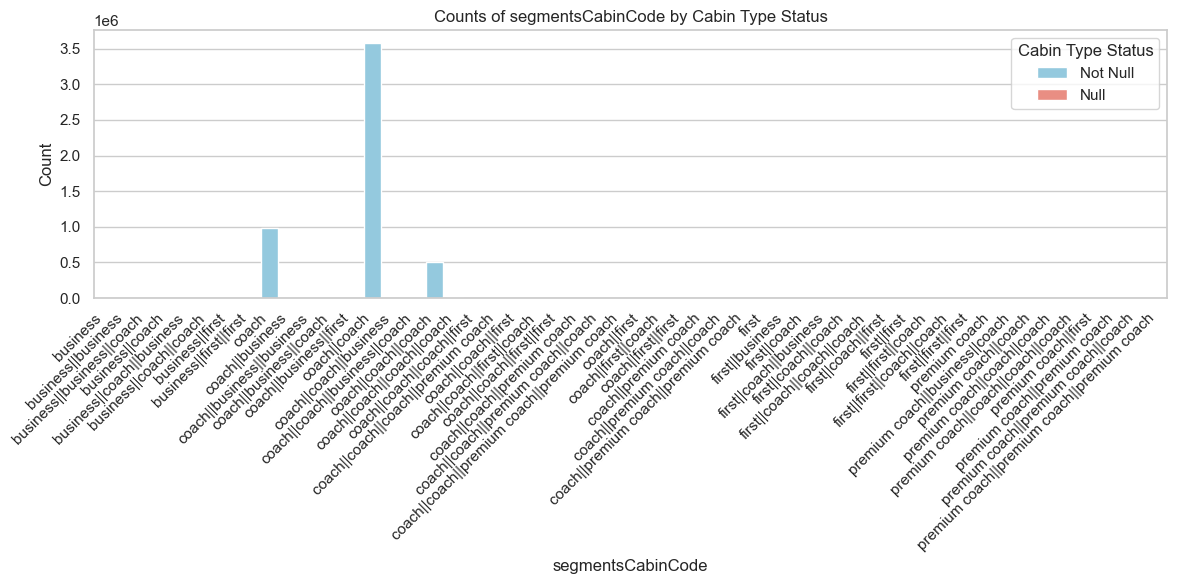

In [8]:
# Create a new column for cabin_type_status
df_data['cabin_type_status'] = df_data['cabin_type'].isnull().replace({True: 'Null', False: 'Not Null'})

# Count occurrences of each unique segmentsCabinCode grouped by cabin_type_status
count_data = df_data.groupby(['segmentsCabinCode', 'cabin_type_status']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data, x='segmentsCabinCode', y='count', hue='cabin_type_status', palette=['skyblue', 'salmon'])
plt.title('Counts of segmentsCabinCode by Cabin Type Status')
plt.xlabel('segmentsCabinCode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cabin Type Status')
plt.tight_layout()
plt.show()


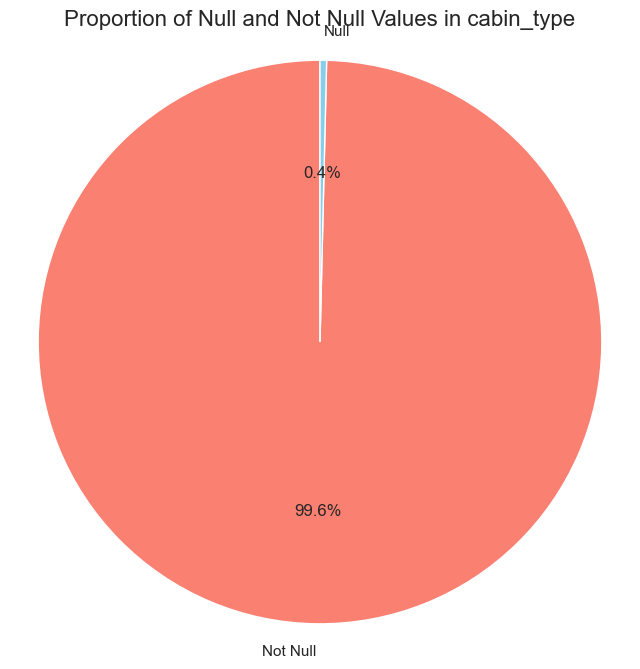

In [9]:
# Count the occurrences of each status
status_counts = df_data['cabin_type_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Proportion of Null and Not Null Values in cabin_type', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [10]:
# Drop records with null values in the 'cabin_type' column
df_data = df_data.dropna(subset=['cabin_type'])

C:\Users\paiyn\AppData\Local\Temp\ipykernel_29500\5392815.py:10: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(data=count_data, x='segmentsCabinCode', y='count', hue='cabin_type_status', palette=['skyblue', 'salmon'])


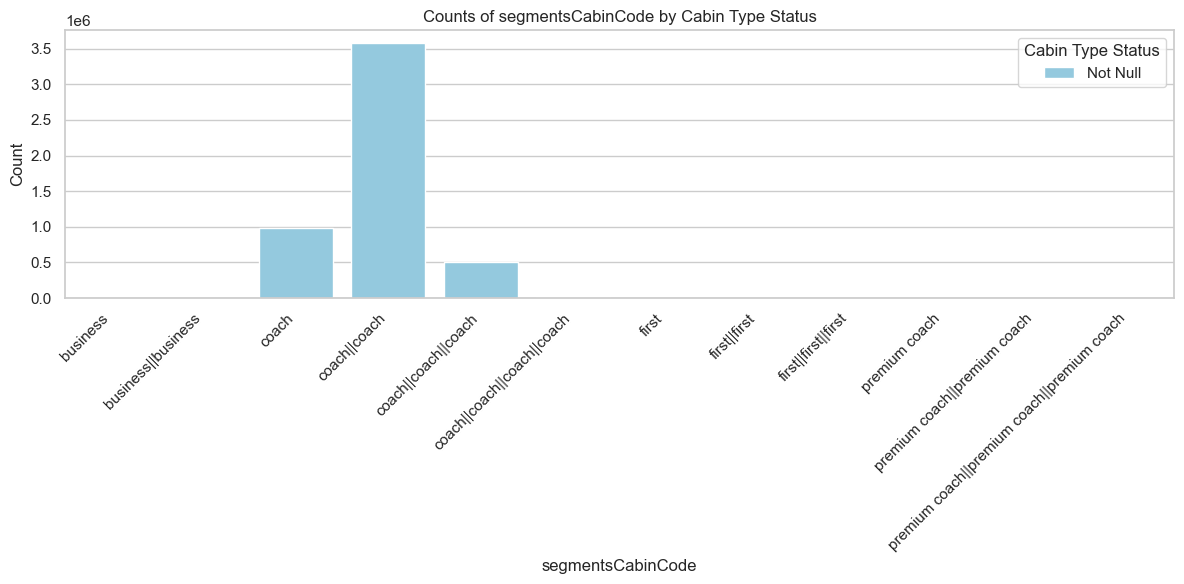

In [11]:
# Visualize the values of cabin_type
# Create a new column for cabin_type_status
df_data['cabin_type_status'] = df_data['cabin_type'].isnull().replace({True: 'Null', False: 'Not Null'})

# Count occurrences of each unique segmentsCabinCode grouped by cabin_type_status
count_data = df_data.groupby(['segmentsCabinCode', 'cabin_type_status']).size().reset_index(name='count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=count_data, x='segmentsCabinCode', y='count', hue='cabin_type_status', palette=['skyblue', 'salmon'])
plt.title('Counts of segmentsCabinCode by Cabin Type Status')
plt.xlabel('segmentsCabinCode')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cabin Type Status')
plt.tight_layout()
plt.show()

# 3. Exploring the dataset

## 3.1 Visalising the distribution of the dataset

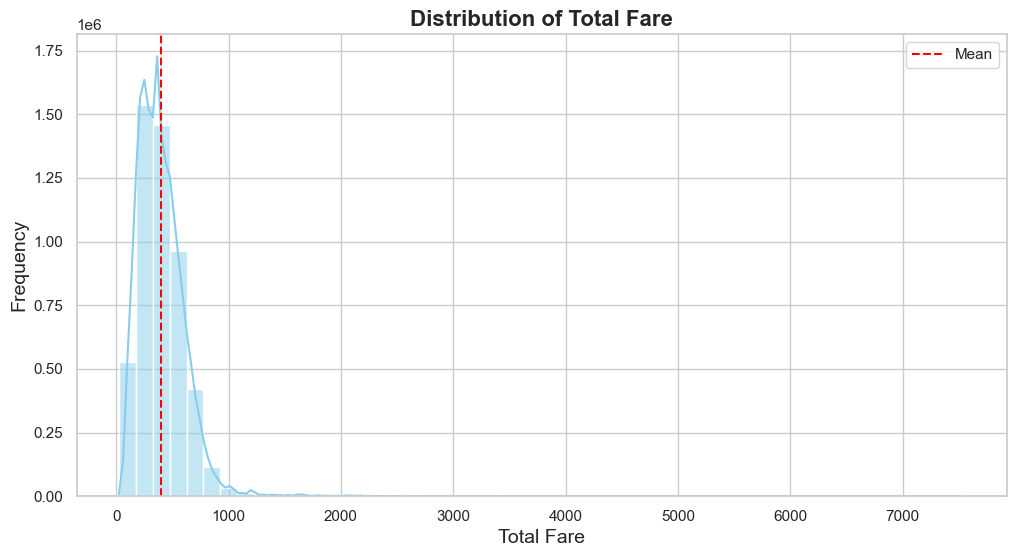

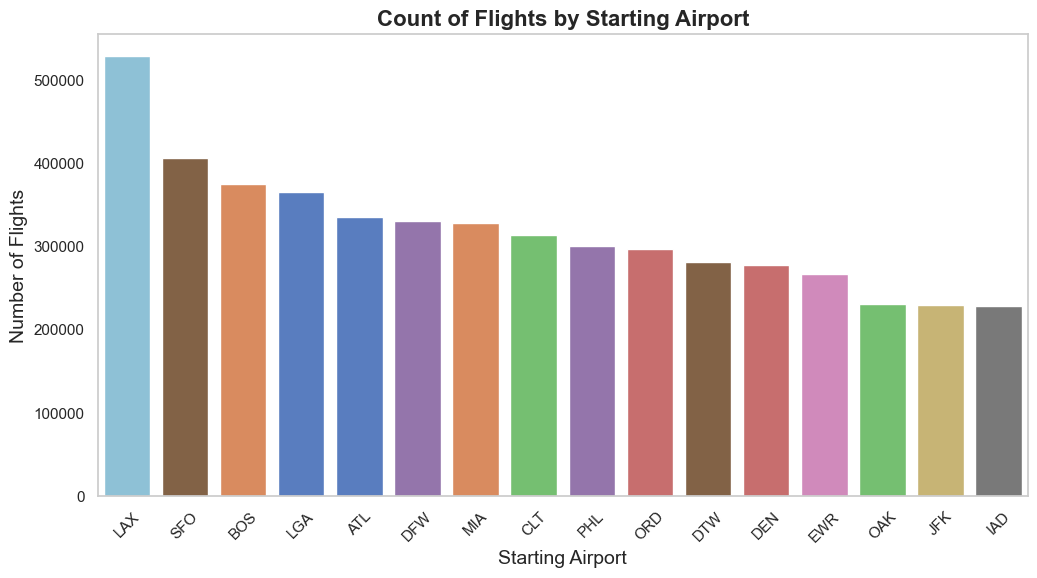

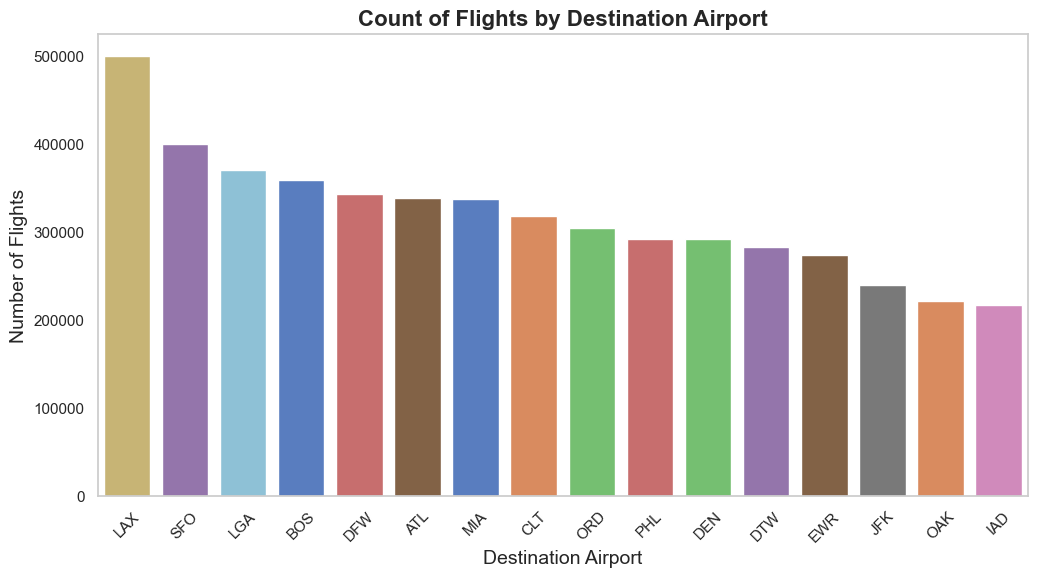

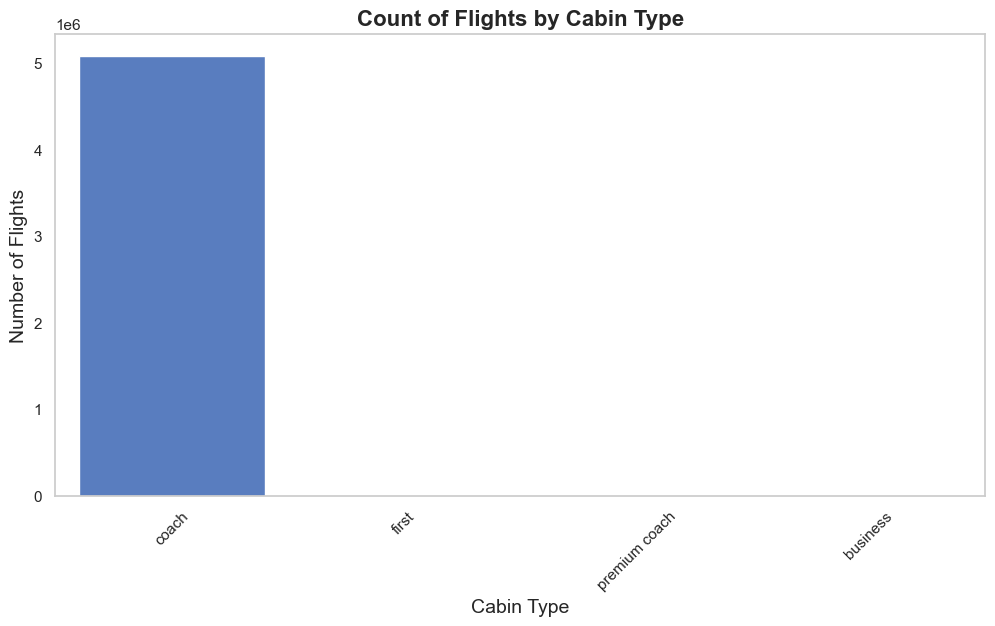

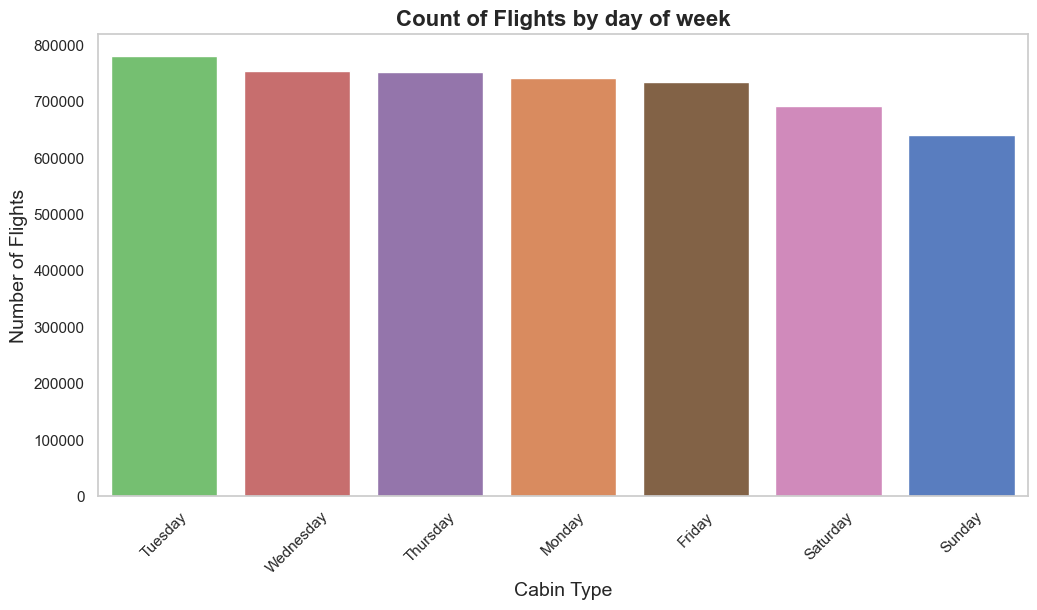

In [12]:

# Set style for seaborn
sns.set(style='whitegrid', palette='pastel')

# 1. Distribution of Total Fare
plt.figure(figsize=(12, 6))
sns.histplot(df_data['totalFare'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Fare', fontsize=16, fontweight='bold')
plt.xlabel('Total Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.axvline(df_data['totalFare'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()

# 2. Count of Starting Airports
plt.figure(figsize=(12, 6))
sns.countplot(data=df_data, x='startingAirport', order=df_data['startingAirport'].value_counts().index, hue='startingAirport', palette='muted', legend=False)
plt.title('Count of Flights by Starting Airport', fontsize=16, fontweight='bold')
plt.xlabel('Starting Airport', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 3. Count of Destination Airports
plt.figure(figsize=(12, 6))
sns.countplot(data=df_data, x='destinationAirport', order=df_data['destinationAirport'].value_counts().index, hue='destinationAirport', palette='muted', legend=False)
plt.title('Count of Flights by Destination Airport', fontsize=16, fontweight='bold')
plt.xlabel('Destination Airport', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 4. Count of flights in each cabin type 
plt.figure(figsize=(12, 6))
sns.countplot(data=df_data, x='cabin_type', order=df_data['cabin_type'].value_counts().index, hue='cabin_type', palette='muted', legend=False)
plt.title('Count of Flights by Cabin Type', fontsize=16, fontweight='bold')
plt.xlabel('Cabin Type', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5. Count of flights in each day of the week  
plt.figure(figsize=(12, 6))
sns.countplot(data=df_data, x='departure_dayofweek', order=df_data['departure_dayofweek'].value_counts().index, hue='departure_dayofweek', palette='muted', legend=False)
plt.title('Count of Flights by day of week', fontsize=16, fontweight='bold')
plt.xlabel('Cabin Type', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


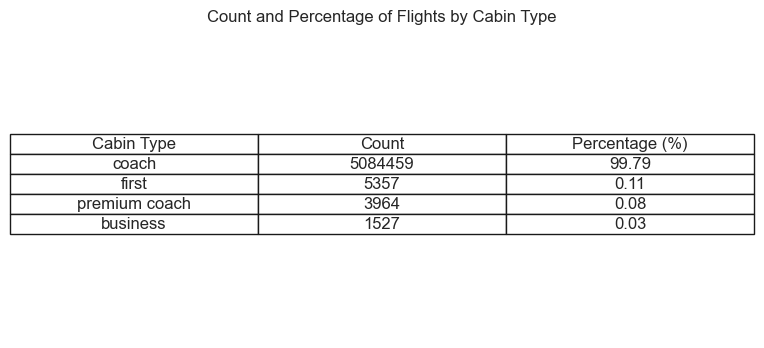

In [13]:
# 6. the percentage of cabin_type - count of flights
# Calculate the count of each cabin type
cabin_counts = df_data['cabin_type'].value_counts()

# Calculate the percentage
cabin_percentages = round(cabin_counts / cabin_counts.sum() * 100,2)

# Create a DataFrame for better formatting
cabin_summary = pd.DataFrame({
    'Count': cabin_counts,
    'Percentage (%)': cabin_percentages
}).reset_index()

# Rename the columns for clarity
cabin_summary.columns = ['Cabin Type', 'Count', 'Percentage (%)']

# Plotting the table
plt.figure(figsize=(8, 4))
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=cabin_summary.values, colLabels=cabin_summary.columns, cellLoc = 'center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)  # Adjust the size of the table
plt.title('Count and Percentage of Flights by Cabin Type')
plt.show()

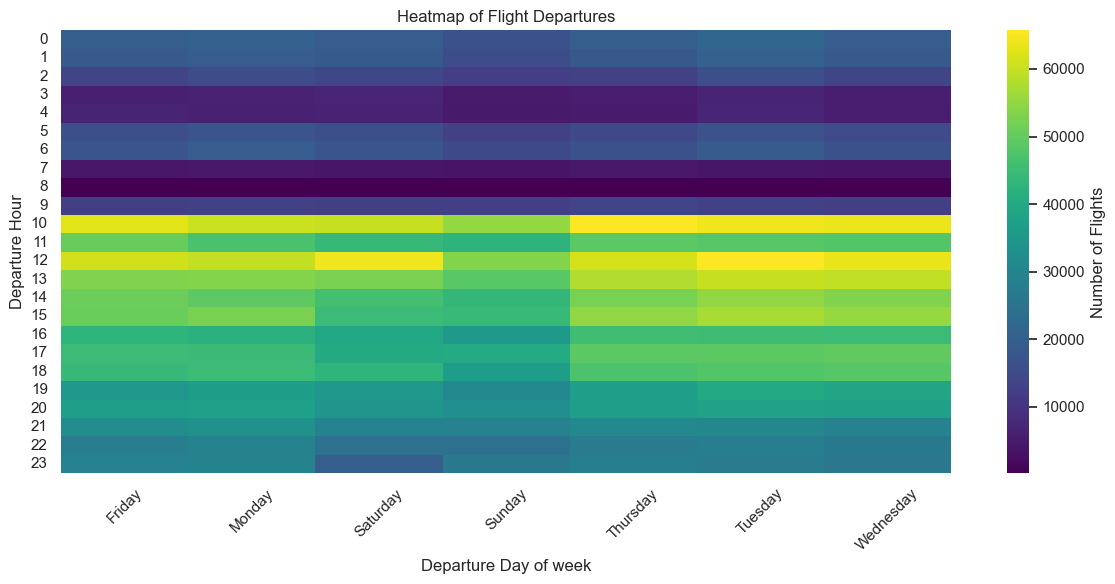

In [14]:
# 7. Heatmap of Departure hour and day of week
pivot_table = df_data.pivot_table(index='departure_hour', columns='departure_dayofweek', values='totalFare', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Number of Flights'}, annot=False) 
plt.title('Heatmap of Flight Departures')
plt.xlabel('Departure Day of week')
plt.ylabel('Departure Hour')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

## 3.2 Features Vs Target variable(Fare) visualisations

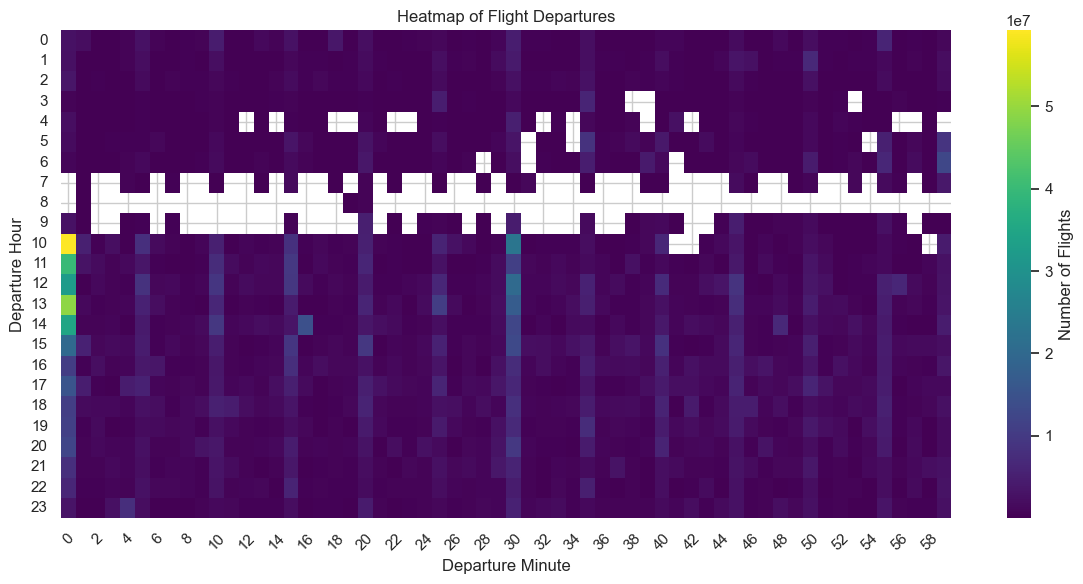

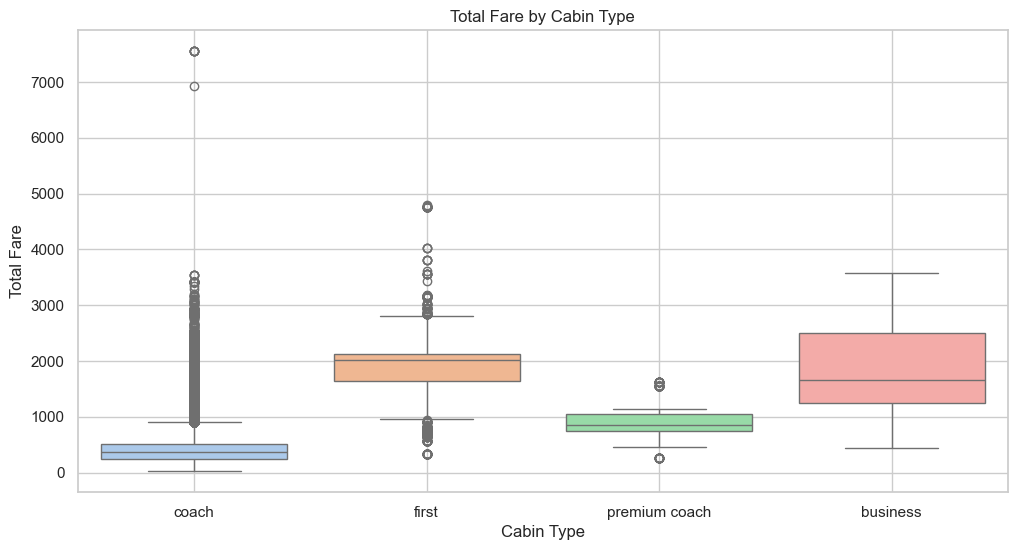

In [15]:
# 1. Heatmap of Departure Times 
pivot_table = df_data.pivot_table(index='departure_hour', columns='departure_minute', values='totalFare', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Number of Flights'}, annot=False)  
plt.title('Heatmap of Flight Departures')
plt.xlabel('Departure Minute')
plt.ylabel('Departure Hour')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

# 2. Boxplot of Total Fare by Cabin Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='cabin_type', y='totalFare', hue = 'cabin_type')
plt.title('Total Fare by Cabin Type')
plt.xlabel('Cabin Type')
plt.ylabel('Total Fare')
plt.grid(True)
plt.show()

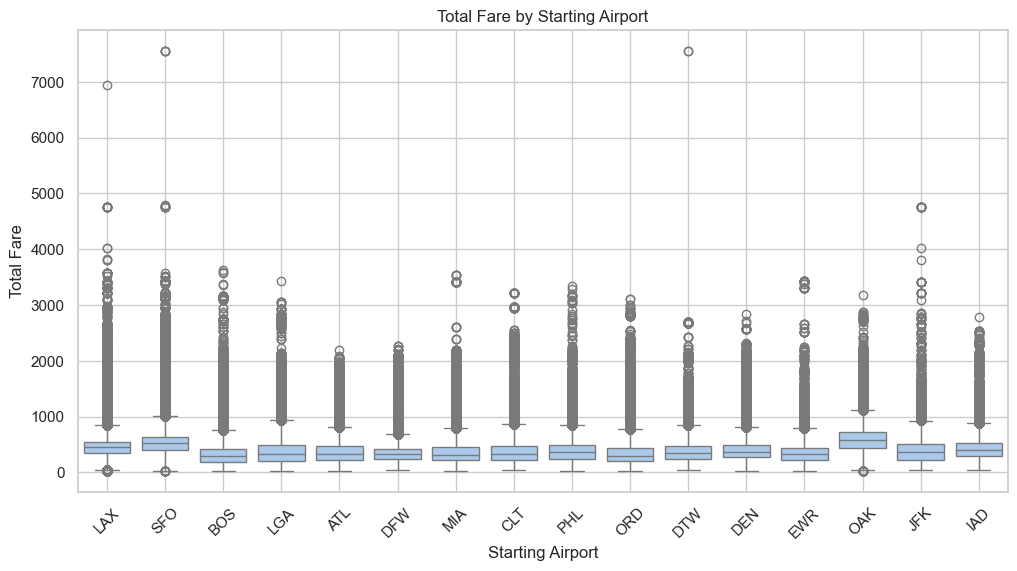

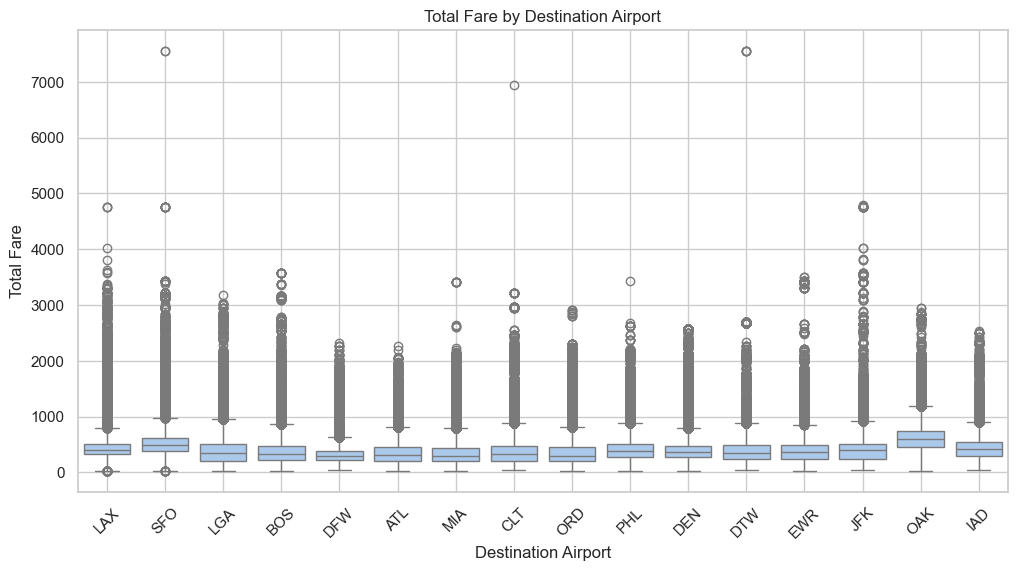

In [16]:
# 3. Box Plot of Total Fare by Starting Airport
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='startingAirport', y='totalFare', order=df_data['startingAirport'].value_counts().index)
plt.title('Total Fare by Starting Airport')
plt.xlabel('Starting Airport')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Box Plot of Total Fare by Destination Airport
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='destinationAirport', y='totalFare', order=df_data['destinationAirport'].value_counts().index)
plt.title('Total Fare by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



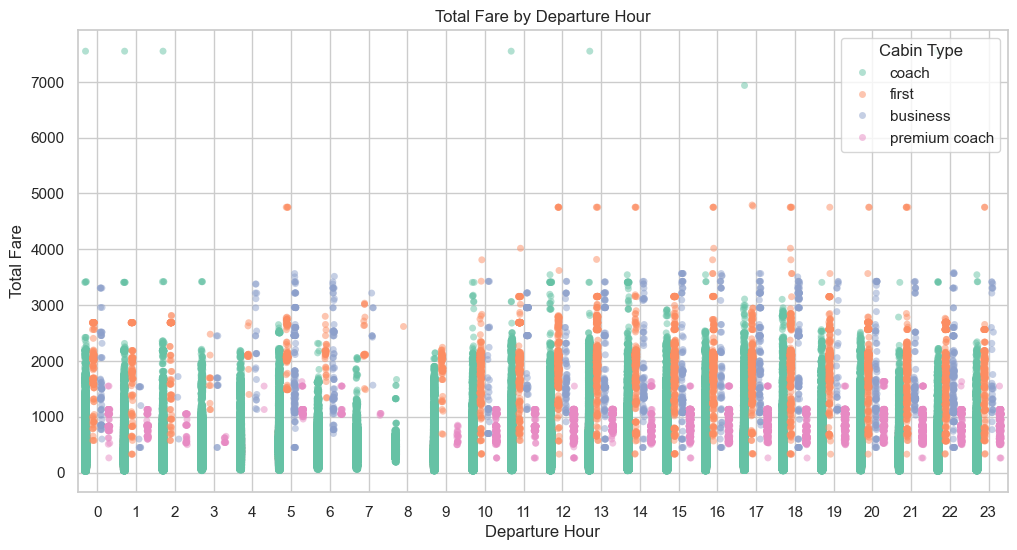

In [17]:
# 5. Strip Plot of Total Fare by Departure Hour
plt.figure(figsize=(12, 6))
sns.stripplot(data=df_data, x='departure_hour', y='totalFare', jitter=True, alpha=0.5, hue='cabin_type', dodge=True, palette='Set2')
plt.title('Total Fare by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Total Fare')
plt.grid(True)
plt.legend(title='Cabin Type', loc='upper right') 
plt.show()

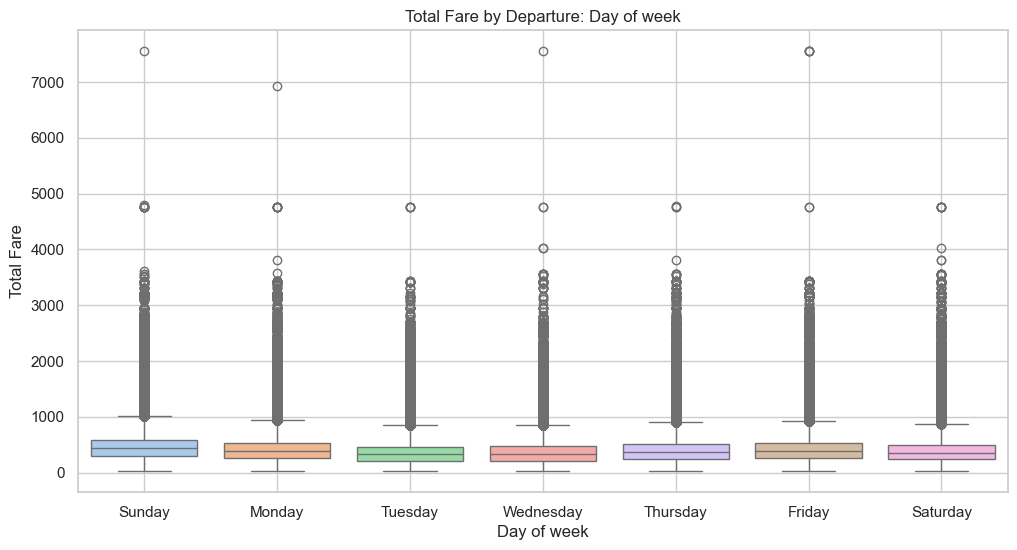

In [18]:
# 6 Boxplot of Total Fare by day of week
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_data, x='departure_dayofweek', y='totalFare', hue = 'departure_dayofweek')
plt.title('Total Fare by Departure: Day of week')
plt.xlabel('Day of week')
plt.ylabel('Total Fare')
plt.grid(True)
plt.show()

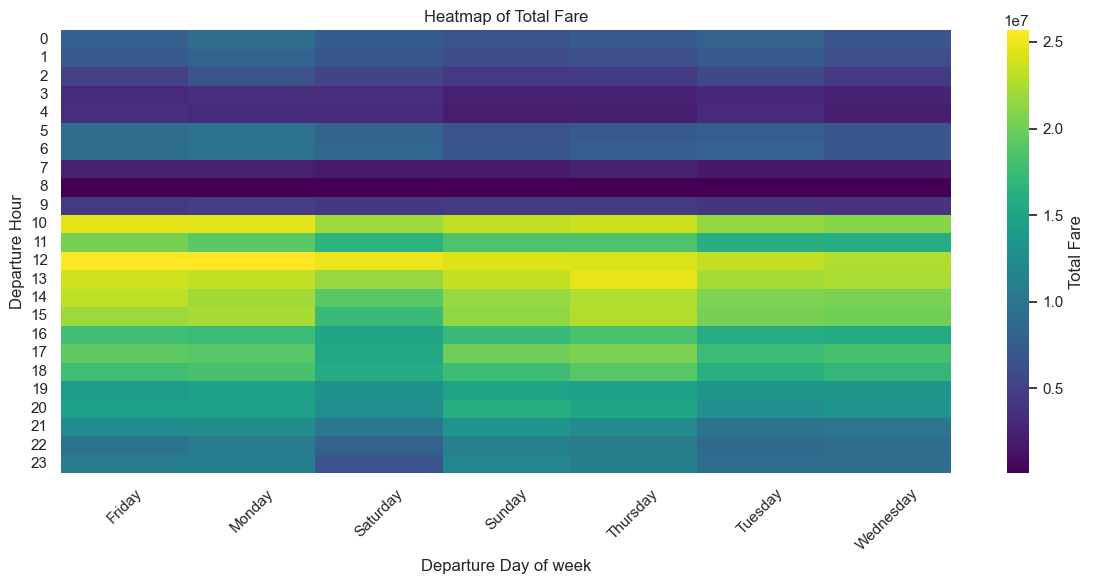

In [19]:
# 7. Heatmap of Departure hour and day of week
pivot_table = df_data.pivot_table(index='departure_hour', columns='departure_dayofweek', values='totalFare', aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='viridis', cbar_kws={'label': 'Total Fare'}, annot=False)  
plt.title('Heatmap of Total Fare')
plt.xlabel('Departure Day of week')
plt.ylabel('Departure Hour')
plt.xticks(rotation=45)
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()


## 3.3 Time series data visualisation

C:\Users\paiyn\AppData\Local\Temp\ipykernel_29500\1165924340.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  monthly_data['YearMonth'] = pd.to_datetime(monthly_data['YearMonth'])


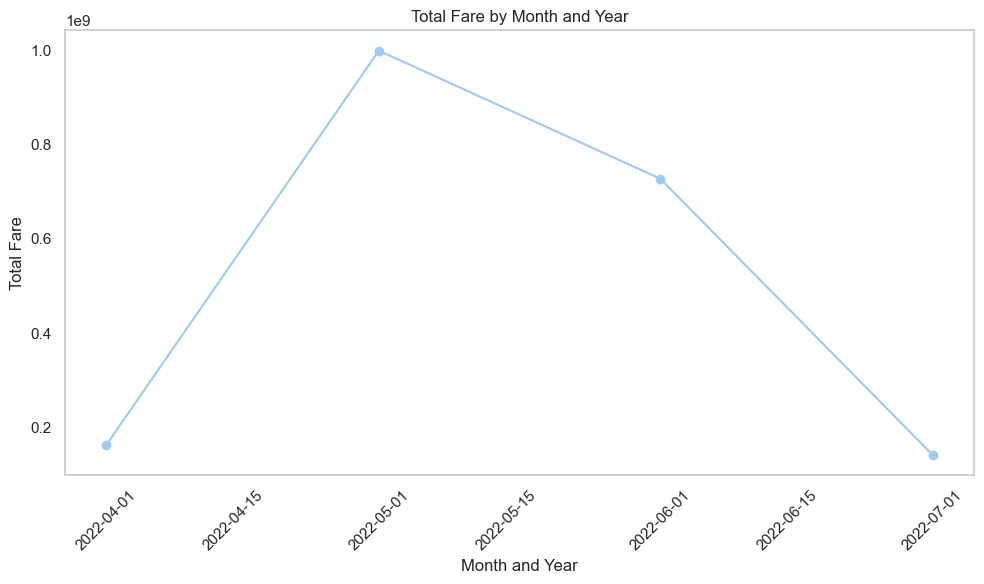

In [20]:
# 1. Departure month_year Vs totalFare


# Create a new column for year and month using strftime
df_data['YearMonth'] = df_data['departureTime'].dt.strftime('%Y-%m')

# Group by Year and Month and sum totalFare
monthly_data = df_data.groupby('YearMonth')['totalFare'].sum().reset_index()

# Convert YearMonth back to a datetime for plotting
monthly_data['YearMonth'] = pd.to_datetime(monthly_data['YearMonth'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['totalFare'], marker='o', linestyle='-')
plt.title('Total Fare by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

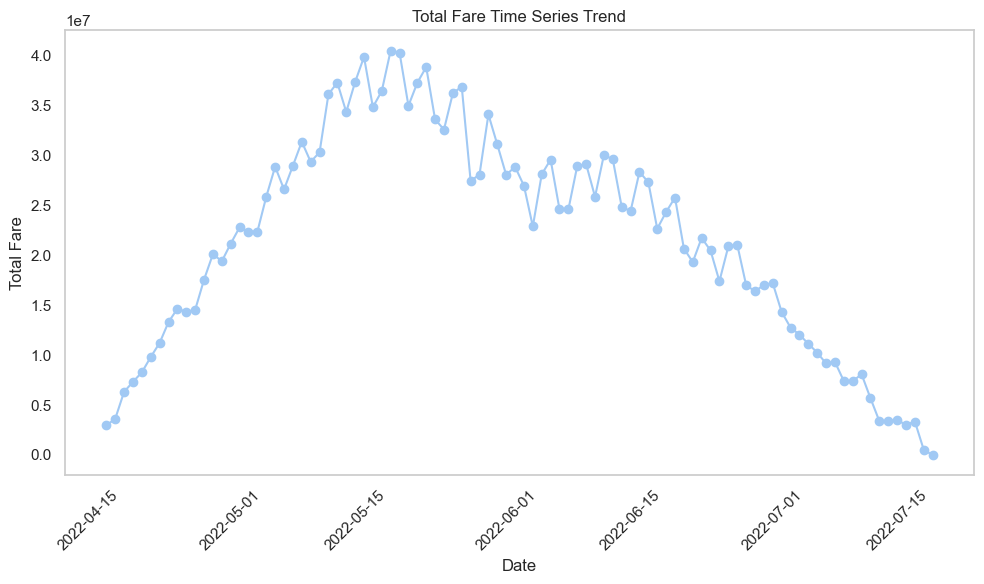

In [21]:
# 2. Date Vs Total fare

# Extract only the date part
df_data['Date'] = df_data['departureTime'].dt.date

# Group by date and sum totalFare
daily_data = df_data.groupby('Date')['totalFare'].sum().reset_index()

# Convert Date back to datetime for plotting
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_data['Date'], daily_data['totalFare'], marker='o', linestyle='-')
plt.title('Total Fare Time Series Trend')
plt.xlabel('Date')
plt.ylabel('Total Fare')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# 4.0 Split the datasets and save in the data folder

In [22]:
# Sort the DataFrame by the date-time column
df_data = df_data.sort_values(by='departureTime')

# Drop the raw time column - since this will not be used as a feature or prediction. only the extracted features from the raw datetime will be used. 
df_data = df_data.drop(columns=['cabin_type_status','departureTime','departure_day','segmentsDepartureTimeRaw','segmentsCabinCode','Date','YearMonth'], errors='ignore')

# Check for duplicate rows
duplicates = df_data.duplicated()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicate rows
df_data = df_data.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print(f"New shape of df_data after removing duplicates: {df_data.shape}")

Number of duplicate rows: 1651067
New shape of df_data after removing duplicates: (3444240, 8)


In [23]:
# Split the data
X_train, y_train, X_val, y_val, X_test, y_test = split_sets_by_time(df_data, target_col='totalFare')

In [24]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2066544, 7)
y_train shape: (2066544,)
X_val shape: (688848, 7)
y_val shape: (688848,)
X_test shape: (688848, 7)
y_test shape: (688848,)


In [25]:
## Verifying if the sample sizes are in correct ratio 60:20:20 (train:val:test)
# Given values
X_train_size = 3068618
y_train_size = 3068618
X_val_size = 1022872
y_val_size = 1022872
X_test_size = 1022872
y_test_size = 1022872

# Total samples
total_samples = X_train_size + X_val_size + X_test_size

# Calculate ratios
training_ratio = X_train_size / total_samples
testing_ratio = (X_val_size + X_test_size) / total_samples  # Val and Test are combined for testing ratio

print(f"Total Samples: {total_samples}")
print(f"Training Ratio: {training_ratio:.2f}")
print(f"Testing Ratio: {testing_ratio:.2f}")

Total Samples: 5114362
Training Ratio: 0.60
Testing Ratio: 0.40


In [26]:
# Save the sets
save_sets(X_train, y_train, X_val, y_val, X_test, y_test)